In [1]:
import pyspark

In [3]:
from pyspark.sql import SparkSession
spark=SparkSession.builder.appName('EDA').getOrCreate()

In [4]:
spark

# RDD

In [5]:
# Dataset- usedcarsales.csv
carSales=spark.read.csv("usedcarsales.csv",header=True,inferSchema=True)

In [14]:
carSales.show(5) # First 5 Rows of Data

+---+-----+---+-----+--------+---+--------+---------+----+-----+------+--------+------------+
|_c0|Price|Age|   KM|FuelType| HP|MetColor|Automatic|  CC|Doors|Weight|AutoType|MetColorType|
+---+-----+---+-----+--------+---+--------+---------+----+-----+------+--------+------------+
|  1|13500| 23|46986|  Diesel| 90|       1|        0|2000|    3|  1165|  Manual|    Metcolor|
|  2|13750| 23|72937|  Diesel| 90|       1|        0|2000|    3|  1165|  Manual|    Metcolor|
|  3|13950| 24|41711|  Diesel| 90|       1|        0|2000|    3|  1165|  Manual|    Metcolor|
|  4|14950| 26|48000|  Diesel| 90|       0|        0|2000|    3|  1165|  Manual| NonMetcolor|
|  5|13750| 30|38500|  Diesel| 90|       0|        0|2000|    3|  1170|  Manual| NonMetcolor|
+---+-----+---+-----+--------+---+--------+---------+----+-----+------+--------+------------+
only showing top 5 rows



In [8]:
carSales.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- Price: integer (nullable = true)
 |-- Age: integer (nullable = true)
 |-- KM: integer (nullable = true)
 |-- FuelType: string (nullable = true)
 |-- HP: integer (nullable = true)
 |-- MetColor: integer (nullable = true)
 |-- Automatic: integer (nullable = true)
 |-- CC: integer (nullable = true)
 |-- Doors: integer (nullable = true)
 |-- Weight: integer (nullable = true)
 |-- AutoType: string (nullable = true)
 |-- MetColorType: string (nullable = true)



In [9]:
carSales.columns # Names of Variables or Columns

['_c0',
 'Price',
 'Age',
 'KM',
 'FuelType',
 'HP',
 'MetColor',
 'Automatic',
 'CC',
 'Doors',
 'Weight',
 'AutoType',
 'MetColorType']

In [10]:
carSales.dtypes

[('_c0', 'int'),
 ('Price', 'int'),
 ('Age', 'int'),
 ('KM', 'int'),
 ('FuelType', 'string'),
 ('HP', 'int'),
 ('MetColor', 'int'),
 ('Automatic', 'int'),
 ('CC', 'int'),
 ('Doors', 'int'),
 ('Weight', 'int'),
 ('AutoType', 'string'),
 ('MetColorType', 'string')]

In [15]:
drop_cols=['_c0','AutoType','MetColorType'] # dropping unnecessary columns

In [23]:
carSalesdf=carSales.drop(*drop_cols)

# EDA

In [26]:
# Exploratory Data Analysis- Descriptive Statistics and Data Vizualization
carSalesdf.describe().show()

+-------+------------------+------------------+------------------+--------+------------------+-------------------+--------------------+------------------+------------------+------------------+
|summary|             Price|               Age|                KM|FuelType|                HP|           MetColor|           Automatic|                CC|             Doors|            Weight|
+-------+------------------+------------------+------------------+--------+------------------+-------------------+--------------------+------------------+------------------+------------------+
|  count|              1436|              1436|              1436|    1436|              1436|               1436|                1436|              1436|              1436|              1436|
|   mean|10730.824512534818| 55.94707520891365| 68533.25974930362|    null|101.50208913649026|  0.674791086350975|0.055710306406685235|1566.8279944289693|4.0334261838440115|1072.4596100278552|
| stddev|3626.9645849102403|18.5999

In [27]:
type(carSalesdf)

pyspark.sql.dataframe.DataFrame

In [28]:
from pyspark.sql.functions import skewness,kurtosis

In [35]:
carSales.select('Price').show(3)

+-----+
|Price|
+-----+
|13500|
|13750|
|13950|
+-----+
only showing top 3 rows



In [36]:
carSales.select(skewness("Price"),kurtosis('Price')).show()

+-----------------+-----------------+
|  skewness(Price)|  kurtosis(Price)|
+-----------------+-----------------+
|1.702104639170034|3.720603948160372|
+-----------------+-----------------+



In [41]:
# DESCRIPTIVE STATISTICS -  UNIVARIATE STATISTICS
# MEASURES OF CENTRAL TENDENCY(MIDPOINT) - MEAN, MEDIAN, MODE
# MEASURES OF DISPERSION(SCATTERING OF OBSERVATIONS AROUND MEAN) - VARIANCE, STANDARD DEVIATION, QUARTILES, RANGE, PERCENTILES
# MEASURES OF ASYMMETRY (HOW CLOSE THE DATA IS TO NORMAL DISTRIBUTION) - SKEWNESS, KURTOSIS

In [38]:
# QUARTILES IDENTIFY THE OUTLIERS PRESENT IN OUR DATA(OUTLIERS- ABNORMAL POINTS OR EXTREME POINTS)
quartiles=carSales.approxQuantile('Price',[0.25,0.50,0.75],0)

In [40]:
quartiles # Q1, Q2 OR Median ,Q3
# Mean of Price - 10730.824
# Median of Price - 9900.0
# IF Mean is distorted, Consider Median

[8450.0, 9900.0, 11950.0]

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

<AxesSubplot:ylabel='Frequency'>

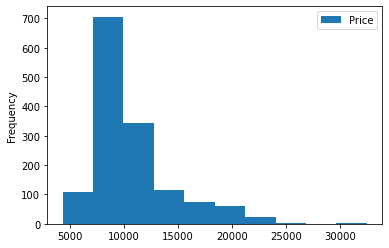

In [48]:
Price=carSales.select('Price').toPandas()
Price.plot(kind="hist")

In [49]:
type(Price)

pandas.core.frame.DataFrame

(array([110., 706., 343., 114.,  75.,  59.,  22.,   4.,   0.,   3.]),
 array([ 4350.,  7165.,  9980., 12795., 15610., 18425., 21240., 24055.,
        26870., 29685., 32500.]),
 <BarContainer object of 10 artists>)

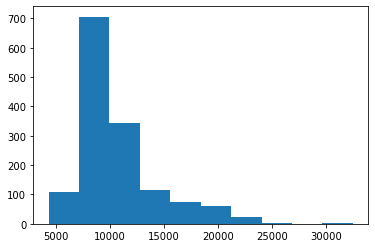

In [50]:
plt.hist(Price) # Histogram identify Skewness, Kurtosis and Outliers

<AxesSubplot:>

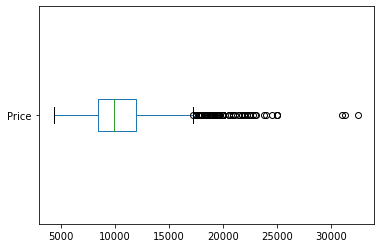

In [53]:
Price.plot(kind='box',vert=False) # Boxplot identify Outliers and Skewness

<AxesSubplot:ylabel='Density'>

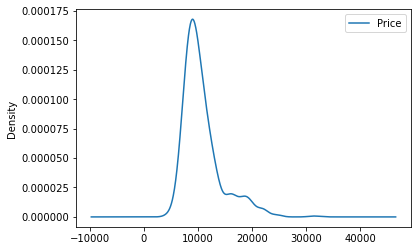

In [54]:
Price.plot(kind='density')

In [55]:
# we Correct the Skewness 
# Positive Skewness - Logarthmic Transformation or Squareroot
# Negative Skewness - Exponential Transformation or Power

In [56]:
import numpy as np

<AxesSubplot:>

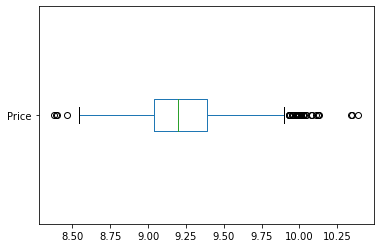

In [58]:
np.log(Price).plot(kind='box',vert=False)

<AxesSubplot:ylabel='Density'>

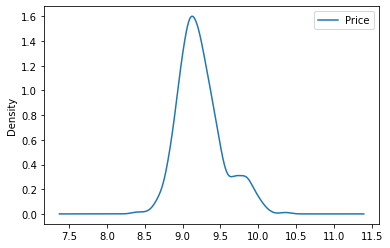

In [59]:
np.log(Price).plot(kind='density')

In [60]:
# Groupby Function
carSales.groupby('FuelType').mean('Price').show()

+--------+------------------+
|FuelType|        avg(Price)|
+--------+------------------+
|  Diesel|11294.554838709677|
|     CNG| 9421.176470588236|
|  Petrol|10679.310126582279|
+--------+------------------+



In [61]:
carSales.groupby('FuelType').mean('Age').show()

+--------+-----------------+
|FuelType|         avg(Age)|
+--------+-----------------+
|  Diesel|50.72258064516129|
|     CNG|56.35294117647059|
|  Petrol|56.58227848101266|
+--------+-----------------+



In [63]:
carSales.groupBy("FuelType").mean('Price','Age','KM').show()

+--------+------------------+-----------------+------------------+
|FuelType|        avg(Price)|         avg(Age)|           avg(KM)|
+--------+------------------+-----------------+------------------+
|  Diesel|11294.554838709677|50.72258064516129|111977.58064516129|
|     CNG| 9421.176470588236|56.35294117647059|117865.58823529411|
|  Petrol|10679.310126582279|56.58227848101266| 62542.34256329114|
+--------+------------------+-----------------+------------------+



In [65]:
carSales.groupby('Automatic').mean("Price",'Age','KM').show()
# Automatic 0 - N0. Automatic 1 -Yes

+---------+-----------------+-----------------+-----------------+
|Automatic|       avg(Price)|         avg(Age)|          avg(KM)|
+---------+-----------------+-----------------+-----------------+
|        1|        11224.625|           58.375|        55898.125|
|        0|10701.69174041298|55.80383480825959|69278.69542772861|
+---------+-----------------+-----------------+-----------------+



In [66]:
carSales.groupby('Doors').mean('Price','CC','Weight').show()

+-----+------------------+------------------+------------------+
|Doors|        avg(Price)|           avg(CC)|       avg(Weight)|
+-----+------------------+------------------+------------------+
|    3|10107.342443729904|1538.1173633440515|1057.7540192926044|
|    5|11503.209198813056|1588.9554896142433|1091.1557863501484|
|    4| 9806.768115942028|1586.9565217391305| 1047.536231884058|
|    2|            8100.0|            1650.0|            1065.0|
+-----+------------------+------------------+------------------+



In [67]:
carSales.crosstab('FuelType','Automatic').show() # Crosstab

+------------------+----+---+
|FuelType_Automatic|   0|  1|
+------------------+----+---+
|            Petrol|1185| 79|
|            Diesel| 155|  0|
|               CNG|  16|  1|
+------------------+----+---+



In [68]:
carSalesdf=carSales.toPandas()

In [69]:
# HYPOTHESIS TESTING - COMPARISION OF MEANS OR AVERAGES OF 2 GROUPS OR CLASSES OR MORE THAN 2 GROUPS OR CLASSES
# ONE VARIABLE - NUMERIC , OTHER VARIABLE - CATEGORICAL WITH EXACTLY 2 LEVELS OR GROUPS
# TEST - 2 SAMPLE INDEPENDENT T-TEST
# NULL - NO SIGNIFICANT DIFFERENCE IN AVERAGE PRICE OF AUTOMATIC 0 & 1 CARS
# ALT - SIGNIFICANT DIFFERENCE IN AVERAGE PRICE OF AUTOMATIC 0 & 1 CARS


# INTERPRETATION
# P -VALUE LESS THAN 0.05, REJECT NULL HYPOTHESIS
# P-VALUE GREATER THAN 0.05, FAIL TO REJECT NULL HYPOTHESIS(ACCEPT NULL)
# 0.05 MEANS 5% ALPHA(PROBABLE ERROR RATE) & 95 % CONFIDENCE LEVEL

In [70]:
auto=carSalesdf[carSalesdf.Automatic==1]
manual=carSalesdf[carSalesdf.Automatic==0]
print(auto.shape)
print(manual.shape)

(80, 13)
(1356, 13)


In [73]:
auto.head()

,_c0,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight,AutoType,MetColorType
21,22,16950,29,43905,Petrol,110,0,1,1600,3,1170,Auto,NonMetcolor
52,53,20500,26,56000,Petrol,110,1,1,1600,5,1180,Auto,Metcolor
54,55,15500,25,49163,Petrol,110,0,1,1600,5,1165,Auto,NonMetcolor
58,59,18950,23,39704,Petrol,110,1,1,1600,5,1180,Auto,Metcolor
80,81,18950,25,20019,Petrol,110,1,1,1600,5,1180,Auto,Metcolor


# T-Test

In [77]:
from scipy.stats import ttest_ind
ttest_ind(auto.Price,manual.Price,equal_var=False)

Ttest_indResult(statistic=1.249930314314651, pvalue=0.21461957865398504)

In [75]:
# Since pvalue=0.214 is greater than 0.05, Fail to reject Null(i.e. difference is minimal) 

In [78]:
# Test Null Average Age of Automatic 0 & 1 Cars is Equal?
ttest_ind(auto.Age,manual.Age,equal_var=False)

Ttest_indResult(statistic=1.171996382758743, pvalue=0.24436023798492446)

In [79]:
# Since pvalue=0.244 is greater than 0.05, Fail to reject Null

In [81]:
# Test Null Average Weight of Automatic 0 & 1 Cars is Equal?
ttest_ind(auto.Weight,manual.Weight,equal_var=False)

Ttest_indResult(statistic=2.7372769943348585, pvalue=0.007389644793477585)

In [83]:
# Since pvalue=0.007 is less than 0.05, we reject Null 

In [82]:
# REGRESSION ALGORITHMS - DEPENDENT VARIABLE IS NUMERICAL, CONTINUOUS, CLOSER TO NORMAL DISTRIBUTION, WITHOUT ANY OUTLIERS 
# & MISSING VALUES

In [84]:
# One Variable Numeric and Other Variable is Categorical with more than 2 levels or groups
# Hypotesis test - Anova Single factor or One way Anova
carSales.groupby('FuelType').mean('Price','Age','Weight').show()

+--------+------------------+-----------------+------------------+
|FuelType|        avg(Price)|         avg(Age)|       avg(Weight)|
+--------+------------------+-----------------+------------------+
|  Diesel|11294.554838709677|50.72258064516129|            1158.4|
|     CNG| 9421.176470588236|56.35294117647059|1097.8235294117646|
|  Petrol|10679.310126582279|56.58227848101266| 1061.579905063291|
+--------+------------------+-----------------+------------------+



In [85]:
# Split the Data into 3 Subsets - Use Pandas Dataframe(we dont have hypothesis testing in pyspark)
#carSales- Spark RDD & carSalesdf- Pandas Dataframe
cng=carSalesdf[carSalesdf.FuelType=='CNG']
diesel=carSalesdf[carSalesdf.FuelType=='Diesel']
petrol=carSalesdf[carSalesdf.FuelType=='Petrol']
print(cng.shape)
print(diesel.shape)
print(petrol.shape)

(17, 13)
(155, 13)
(1264, 13)


# ANOVA Test

In [86]:
from scipy.stats import f_oneway

In [87]:
# Null - No Significant difference in Average Prices of CNG, Diesel & Petrol cars
# Alt - Significant difference in Average Prices of CNG, Diesel & Petrol cars

In [88]:
f_oneway(cng.Price,diesel.Price,petrol.Price)

F_onewayResult(statistic=3.1171479782774187, pvalue=0.044583699346313316)

In [89]:
# Since pvalue=0.044 is less than 0.05, Reject Null 

In [91]:
# Test Null Average Weight of cng, diesel & petrol cars is equal?
f_oneway(cng.Weight,diesel.Weight,petrol.Weight)

F_onewayResult(statistic=350.13918022353243, pvalue=1.5411383170433314e-124)

In [92]:
# Since  pvalue=1.5411383170433314e-124 is less tham 0.05, Reject Null

In [93]:
# Both Variables are Categorical, Hypothesis testing - Chi -Square Test of Independence
# Input of this Test is Cross Tabulation
# Null - No Association between both Variables
# Alt - Association between both Variables

In [95]:
pd.crosstab(carSalesdf.FuelType,carSalesdf.Doors)

Doors,2,3,4,5
FuelType,,,,
CNG,0,6,3,8
Diesel,1,61,14,79
Petrol,1,555,121,587


# Chi-Square Test

In [96]:
from scipy.stats import chi2_contingency

In [97]:
chi2_contingency(pd.crosstab(carSalesdf.FuelType,carSalesdf.Doors))

(5.918157069132852,
 0.4324204359207403,
 6,
 array([[2.36768802e-02, 7.36350975e+00, 1.63370474e+00, 7.97910864e+00],
        [2.15877437e-01, 6.71378830e+01, 1.48955432e+01, 7.27506964e+01],
        [1.76044568e+00, 5.47498607e+02, 1.21470752e+02, 5.93270195e+02]]))

In [99]:
# Since pvalue=0.4324 is greater than 0.05, Fail to Reject Null(no relationship between doors and FuelType)

In [104]:
# Test Null is there Association between FuelType and Automatic?
chi2_contingency(pd.crosstab(carSalesdf.FuelType,carSalesdf.Automatic))

(10.255335220371334,
 0.005930376304755165,
 2,
 array([[1.60529248e+01, 9.47075209e-01],
        [1.46364903e+02, 8.63509749e+00],
        [1.19358217e+03, 7.04178273e+01]]))

In [105]:
# Since pvalue=0.0059 is less than 0.05, reject Null Hypothesis

# Data Preprocessing

In [108]:
# 1) Check for Duplicate Columns or Variables - Delete Duplicates
# 2) Check for Zero Columns or Single Value Columns - Delete
# 3) Missing Value Imputation
# If there are more than 70% of missing values in a Variable, then impute with word lik 'missing' or 'notavailble',if it is 
# numeric column create a missing identifier 99999 or 11111
# If less than 70% of data missing or data avialble(Numeric Variable -  Mean or Median, if it is categorical variable- Mode or 
# most Frequent Class Identity)

# Python & R - missing value Imputation Algorithms
# a) Multivariate Imputation using Chained Equations- mice
# b) missForest - Random Forest Imputation
# c) KNN Imputation using K Nearest Neighbors Algorithm
# d) Probabilistic PCA using Principle Component Analysis

# 4) Data Transformation-
# Dependent Variable - Logarthmic Transformation or Square Root Transformation for Positive Skewness
# Dependent Variable - Exponential Transformation or Power Transformation for Negative Skewness

# Independent Variable - 
# Standard Scaling- Scaling using Z score=(x-mean)/std = it also gives negative values
# Normalization or Min Max Scaling - Min Max = (X-Xmin)/(Xmax-Xmin) = (0,1)

# 5) Correction of Duplicate levels within a variable. Ex - lf,low fat, Low Fat
# 6) Reducing Number of Levels or Groups in Categorical Variables into others or miscellaneous
# 7) Creation of New Variable from existing Variables. 2 date Columns calculate difference between as age, num of days, or Ratio
# 8) Extracting Information from Identifiers & ID
# 9) LabelEncoder or StringIndexer must be done on Categorical Columns to convert into Dummy Variable Encoding.Male- 1, Female-0
# Label Encoder - Encode in Single Column
# OneHotEncoder-  Creates new Columns & uses0/1 = No/Yes

In [109]:
# Spark RDD - Resilient Distributed Datasets -  carSales
carSales.show(3)

+---+-----+---+-----+--------+---+--------+---------+----+-----+------+--------+------------+
|_c0|Price|Age|   KM|FuelType| HP|MetColor|Automatic|  CC|Doors|Weight|AutoType|MetColorType|
+---+-----+---+-----+--------+---+--------+---------+----+-----+------+--------+------------+
|  1|13500| 23|46986|  Diesel| 90|       1|        0|2000|    3|  1165|  Manual|    Metcolor|
|  2|13750| 23|72937|  Diesel| 90|       1|        0|2000|    3|  1165|  Manual|    Metcolor|
|  3|13950| 24|41711|  Diesel| 90|       1|        0|2000|    3|  1165|  Manual|    Metcolor|
+---+-----+---+-----+--------+---+--------+---------+----+-----+------+--------+------------+
only showing top 3 rows



In [110]:
from pyspark.ml.feature import StringIndexer

In [119]:
fuel_dummy=StringIndexer(inputCol='FuelType',outputCol='Fueldummy')
Autodummy=StringIndexer(inputCol='AutoType',outputCol='autodummy')
metcolordummy=StringIndexer(inputCol='MetColorType',outputCol='MetColordummy')

In [120]:
from pyspark.ml import Pipeline

In [130]:
#indexer=[StringIndexer(inputCol=column,outputCol=column+"index").fit(carSales).transform(carSales) 
#                      for column in carSales.columns
#         ]

In [121]:
from pyspark.ml import Pipeline

In [124]:
pipeline=Pipeline(stages=[fuel_dummy,Autodummy,metcolordummy])

In [126]:
carSalesrdd=pipeline.fit(carSales).transform(carSales)

In [129]:
carSalesrdd.show(3)

+---+-----+---+-----+--------+---+--------+---------+----+-----+------+--------+------------+---------+---------+-------------+
|_c0|Price|Age|   KM|FuelType| HP|MetColor|Automatic|  CC|Doors|Weight|AutoType|MetColorType|Fueldummy|autodummy|MetColordummy|
+---+-----+---+-----+--------+---+--------+---------+----+-----+------+--------+------------+---------+---------+-------------+
|  1|13500| 23|46986|  Diesel| 90|       1|        0|2000|    3|  1165|  Manual|    Metcolor|      1.0|      0.0|          0.0|
|  2|13750| 23|72937|  Diesel| 90|       1|        0|2000|    3|  1165|  Manual|    Metcolor|      1.0|      0.0|          0.0|
|  3|13950| 24|41711|  Diesel| 90|       1|        0|2000|    3|  1165|  Manual|    Metcolor|      1.0|      0.0|          0.0|
+---+-----+---+-----+--------+---+--------+---------+----+-----+------+--------+------------+---------+---------+-------------+
only showing top 3 rows



In [131]:
carSalesrdd.columns

['_c0',
 'Price',
 'Age',
 'KM',
 'FuelType',
 'HP',
 'MetColor',
 'Automatic',
 'CC',
 'Doors',
 'Weight',
 'AutoType',
 'MetColorType',
 'Fueldummy',
 'autodummy',
 'MetColordummy']

In [132]:
drop_cols=['_c0','AutoType','MetColorType','Automatic','FuelType','MetColor']
carSalesrdd.drop(*drop_cols)

DataFrame[Price: int, Age: int, KM: int, HP: int, CC: int, Doors: int, Weight: int, Fueldummy: double, autodummy: double, MetColordummy: double]

In [133]:
from pyspark.ml.feature import RFormula

In [138]:
formula=RFormula(formula='Price~.',featuresCol='features',labelCol='label')

In [139]:
carSalesfinal=formula.fit(carSalesrdd).transform(carSalesrdd)
carSalesfinal.select('features','label').show(5)

+--------------------+-------+
|            features|  label|
+--------------------+-------+
|[1.0,23.0,46986.0...|13500.0|
|[2.0,23.0,72937.0...|13750.0|
|[3.0,24.0,41711.0...|13950.0|
|[4.0,26.0,48000.0...|14950.0|
|[5.0,30.0,38500.0...|13750.0|
+--------------------+-------+
only showing top 5 rows



In [144]:
carSalesfinal.show(3)

+---+-----+---+-----+--------+---+--------+---------+----+-----+------+--------+------------+---------+---------+-------------+--------------------+-------+
|_c0|Price|Age|   KM|FuelType| HP|MetColor|Automatic|  CC|Doors|Weight|AutoType|MetColorType|Fueldummy|autodummy|MetColordummy|            features|  label|
+---+-----+---+-----+--------+---+--------+---------+----+-----+------+--------+------------+---------+---------+-------------+--------------------+-------+
|  1|13500| 23|46986|  Diesel| 90|       1|        0|2000|    3|  1165|  Manual|    Metcolor|      1.0|      0.0|          0.0|[1.0,23.0,46986.0...|13500.0|
|  2|13750| 23|72937|  Diesel| 90|       1|        0|2000|    3|  1165|  Manual|    Metcolor|      1.0|      0.0|          0.0|[2.0,23.0,72937.0...|13750.0|
|  3|13950| 24|41711|  Diesel| 90|       1|        0|2000|    3|  1165|  Manual|    Metcolor|      1.0|      0.0|          0.0|[3.0,24.0,41711.0...|13950.0|
+---+-----+---+-----+--------+---+--------+---------+----+

In [145]:
from pyspark.ml.regression import LinearRegression

In [146]:
reg=LinearRegression(featuresCol='features',labelCol='label')

In [147]:
regmodel=reg.fit(carSalesfinal)

In [149]:
regsummary=regmodel.evaluate(carSalesfinal)

In [150]:
regsummary.r2 # R Square

0.8702891304792942

In [151]:
regsummary.r2adj # Adjusted R Square

0.8688265695826548

In [152]:
regsummary.rootMeanSquaredError # RMSE

1305.8107238536647

In [153]:
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
from pyspark.ml.evaluation import RegressionEvaluator

In [154]:
lrparamGrid = (ParamGridBuilder()
             .addGrid(reg.regParam, [0.001, 0.01, 0.1, 0.5, 1.0, 2.0])
             #  .addGrid(reg.regParam, [0.01, 0.1, 0.5])
             .addGrid(reg.elasticNetParam, [0.0, 0.25, 0.5, 0.75, 1.0])
             #  .addGrid(reg.elasticNetParam, [0.0, 0.5, 1.0])
             .addGrid(reg.maxIter, [1, 5, 10, 20, 50])
             #  .addGrid(lr.maxIter, [1, 5, 10])
             .build())

# Evaluate model
regevaluator = RegressionEvaluator(predictionCol="prediction", labelCol="label", metricName="rmse")

# Create 5-fold CrossValidator
lrcv = CrossValidator(estimator = reg,
                    estimatorParamMaps = lrparamGrid,
                    evaluator = regevaluator,
                    numFolds = 10)

In [157]:
#lrcvModel = lrcv.fit(carSalesfinal)